In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7f979afa7245dc4c3241877486623a4


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | peace river
Processing Record 2 of Set 13 | tuktoyaktuk
Processing Record 3 of Set 13 | primorsk
Processing Record 4 of Set 13 | hasaki
Processing Record 5 of Set 13 | mar del plata
Processing Record 6 of Set 13 | shingu
Processing Record 7 of Set 13 | upernavik
Processing Record 8 of Set 13 | vila franca do campo
Processing Record 9 of Set 13 | avarua
Processing Record 10 of Set 13 | takoradi
Processing Record 11 of Set 13 | kodiak
Processing Record 12 of Set 13 | borovoy
Processing Record 13 of Set 13 | padang
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | hobart
Processing Record 16 of Set 13 | alpinopolis
Processing Record 17 of Set 13 | balsas
Processing Record 18 of Set 13 | thompson
Processing Record 19 of Set 13 | qui nhon
Processing Record 20 of Set 13 | victoria
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | ponta do sol
Processing Record 23 of Set 13 | iqaluit
Processing Record 24 of Set 13

Processing Record 39 of Set 16 | port alfred
Processing Record 40 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 16 | ondorhaan
City not found. Skipping...
Processing Record 42 of Set 16 | polevskoy
Processing Record 43 of Set 16 | huangzhai
Processing Record 44 of Set 16 | acurenam
Processing Record 45 of Set 16 | homer
Processing Record 46 of Set 16 | souillac
Processing Record 47 of Set 16 | srednekolymsk
Processing Record 48 of Set 16 | ilulissat
Processing Record 49 of Set 16 | rafai
Processing Record 50 of Set 16 | sola
Processing Record 1 of Set 17 | praia
Processing Record 2 of Set 17 | dunedin
Processing Record 3 of Set 17 | cork
Processing Record 4 of Set 17 | nanortalik
Processing Record 5 of Set 17 | russellville
Processing Record 6 of Set 17 | shwebo
Processing Record 7 of Set 17 | sanandaj
Processing Record 8 of Set 17 | clovis
Processing Record 9 of Set 17 | caravelas
Processing Record 10 of Set 17 | biak
Processing Record 11 of Set 17 | 

Processing Record 21 of Set 20 | lompoc
Processing Record 22 of Set 20 | zheleznodorozhnyy
Processing Record 23 of Set 20 | belaya gora
Processing Record 24 of Set 20 | kousseri
Processing Record 25 of Set 20 | burnie
Processing Record 26 of Set 20 | ancud
Processing Record 27 of Set 20 | tashtagol
Processing Record 28 of Set 20 | sitka
Processing Record 29 of Set 20 | mao
Processing Record 30 of Set 20 | cockburn town
Processing Record 31 of Set 20 | itaituba
Processing Record 32 of Set 20 | port blair
Processing Record 33 of Set 20 | doctor pedro p. pena
City not found. Skipping...
Processing Record 34 of Set 20 | charters towers
Processing Record 35 of Set 20 | nizhniy odes
Processing Record 36 of Set 20 | adrar
Processing Record 37 of Set 20 | labuan
Processing Record 38 of Set 20 | impfondo
Processing Record 39 of Set 20 | kulhudhuffushi
Processing Record 40 of Set 20 | barinas
Processing Record 41 of Set 20 | ariquemes
Processing Record 42 of Set 20 | darhan
Processing Record 43 

Processing Record 10 of Set 24 | rungata
City not found. Skipping...
Processing Record 11 of Set 24 | karlskrona
Processing Record 12 of Set 24 | morti
City not found. Skipping...
Processing Record 13 of Set 24 | wanning
Processing Record 14 of Set 24 | mudgee
Processing Record 15 of Set 24 | mercedes
Processing Record 16 of Set 24 | kelowna
Processing Record 17 of Set 24 | pekan
Processing Record 18 of Set 24 | ust-kan
Processing Record 19 of Set 24 | kuala lipis
Processing Record 20 of Set 24 | angoche
Processing Record 21 of Set 24 | galle
Processing Record 22 of Set 24 | salalah
Processing Record 23 of Set 24 | elliot lake
Processing Record 24 of Set 24 | birjand
Processing Record 25 of Set 24 | yumen
Processing Record 26 of Set 24 | zhoucheng
Processing Record 27 of Set 24 | puerto carreno
Processing Record 28 of Set 24 | yakeshi
Processing Record 29 of Set 24 | yafran
Processing Record 30 of Set 24 | isiro
Processing Record 31 of Set 24 | turkistan
Processing Record 32 of Set 24 

In [9]:
len(city_data)

583

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Peace River,56.25,-117.29,23.00,53,90,11.41,CA,2020-11-07 21:32:37
1,Tuktoyaktuk,69.45,-133.04,26.60,86,75,24.16,CA,2020-11-07 21:32:37
2,Primorsk,46.73,36.34,49.71,68,78,7.20,UA,2020-11-07 21:32:37
3,Hasaki,35.73,140.83,55.40,100,75,1.12,JP,2020-11-07 21:32:38
4,Mar Del Plata,-38.00,-57.56,71.60,53,0,6.93,AR,2020-11-07 21:29:40
5,Shingu,33.73,135.98,61.61,86,100,4.54,JP,2020-11-07 21:32:38
6,Upernavik,72.79,-56.15,-0.20,78,0,7.85,GL,2020-11-07 21:32:38
7,Vila Franca Do Campo,37.72,-25.43,59.00,72,20,8.05,PT,2020-11-07 21:32:38
8,Avarua,-21.21,-159.78,77.00,73,89,8.43,CK,2020-11-07 21:32:38
9,Takoradi,4.88,-1.76,78.87,87,99,8.93,GH,2020-11-07 21:32:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Peace River,CA,2020-11-07 21:32:37,56.25,-117.29,23.00,53,90,11.41
1,Tuktoyaktuk,CA,2020-11-07 21:32:37,69.45,-133.04,26.60,86,75,24.16
2,Primorsk,UA,2020-11-07 21:32:37,46.73,36.34,49.71,68,78,7.20
3,Hasaki,JP,2020-11-07 21:32:38,35.73,140.83,55.40,100,75,1.12
4,Mar Del Plata,AR,2020-11-07 21:29:40,-38.00,-57.56,71.60,53,0,6.93
5,Shingu,JP,2020-11-07 21:32:38,33.73,135.98,61.61,86,100,4.54
6,Upernavik,GL,2020-11-07 21:32:38,72.79,-56.15,-0.20,78,0,7.85
7,Vila Franca Do Campo,PT,2020-11-07 21:32:38,37.72,-25.43,59.00,72,20,8.05
8,Avarua,CK,2020-11-07 21:32:38,-21.21,-159.78,77.00,73,89,8.43
9,Takoradi,GH,2020-11-07 21:32:39,4.88,-1.76,78.87,87,99,8.93


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604784893.1937666

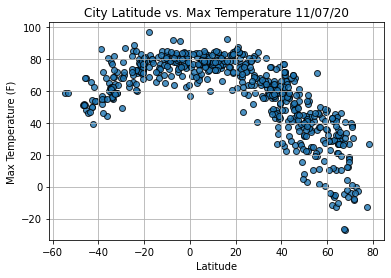

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

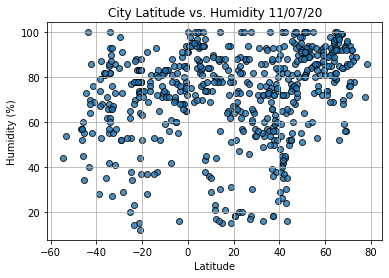

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

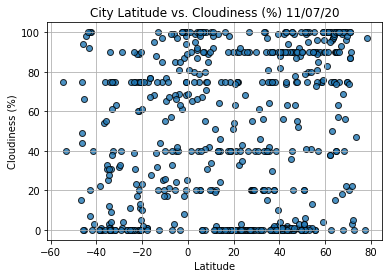

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

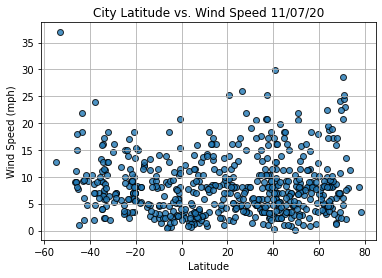

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2020-11-07 21:32:39
Lat                        -23.12
Lng                       -134.97
Max Temp                    71.56
Humidity                       70
Cloudiness                     31
Wind Speed                  16.98
Name: 13, dtype: object

In [50]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
578    False
579    False
580    False
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Peace River,CA,2020-11-07 21:32:37,56.25,-117.29,23.00,53,90,11.41
1,Tuktoyaktuk,CA,2020-11-07 21:32:37,69.45,-133.04,26.60,86,75,24.16
2,Primorsk,UA,2020-11-07 21:32:37,46.73,36.34,49.71,68,78,7.20
3,Hasaki,JP,2020-11-07 21:32:38,35.73,140.83,55.40,100,75,1.12
5,Shingu,JP,2020-11-07 21:32:38,33.73,135.98,61.61,86,100,4.54


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Peace River,CA,2020-11-07 21:32:37,56.25,-117.29,23.00,53,90,11.41
1,Tuktoyaktuk,CA,2020-11-07 21:32:37,69.45,-133.04,26.60,86,75,24.16
2,Primorsk,UA,2020-11-07 21:32:37,46.73,36.34,49.71,68,78,7.20
3,Hasaki,JP,2020-11-07 21:32:38,35.73,140.83,55.40,100,75,1.12
5,Shingu,JP,2020-11-07 21:32:38,33.73,135.98,61.61,86,100,4.54


In [53]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

x_values

0      56.25
1      69.45
2      46.73
3      35.73
5      33.73
       ...  
574    43.55
576    27.20
577     6.12
581    41.33
582    16.33
Name: Lat, Length: 400, dtype: float64

In [54]:
y_values

0      23.00
1      26.60
2      49.71
3      55.40
5      61.61
       ...  
574    43.21
576    66.20
577    78.96
581    71.60
582    92.86
Name: Max Temp, Length: 400, dtype: float64

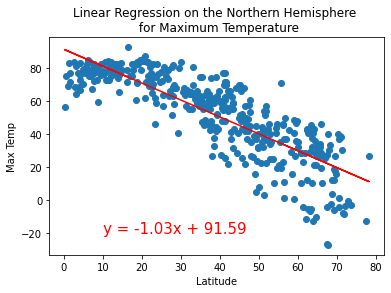

In [55]:
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-20))

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

In [58]:
x_values

4     -38.00
8     -21.21
12     -0.95
13    -23.12
14    -42.88
       ...  
571   -28.47
575   -33.14
578   -41.45
579   -10.27
580   -20.33
Name: Lat, Length: 183, dtype: float64

In [59]:
y_values

4      71.60
8      77.00
12     76.87
13     71.56
14     50.00
       ...  
571    87.01
575    73.42
578    54.00
579    80.60
580    77.00
Name: Max Temp, Length: 183, dtype: float64

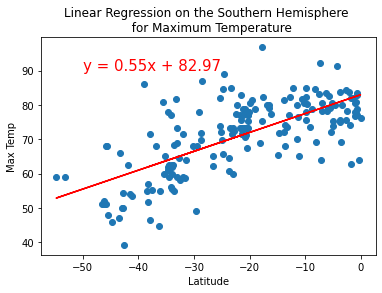

In [61]:
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n  for Maximum Temperature", "Max Temp", (-50,90))

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

In [79]:
x_values

0      56.25
1      69.45
2      46.73
3      35.73
5      33.73
       ...  
574    43.55
576    27.20
577     6.12
581    41.33
582    16.33
Name: Lat, Length: 400, dtype: float64

In [80]:
y_values

0       53
1       86
2       68
3      100
5       86
      ... 
574     79
576     17
577     81
581     40
582     21
Name: Humidity, Length: 400, dtype: int64

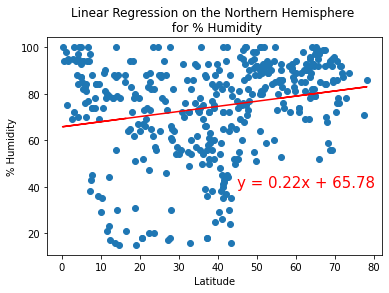

In [84]:
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,40))

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


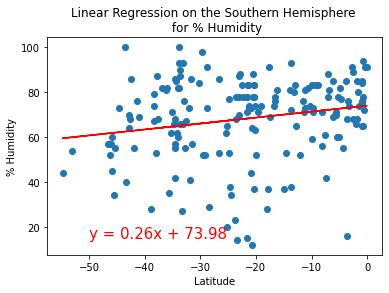

In [72]:
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

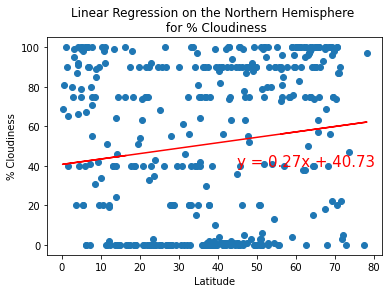

In [87]:
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,40))

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

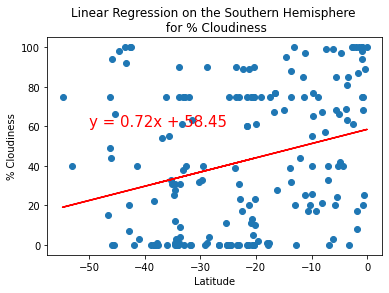

In [89]:
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

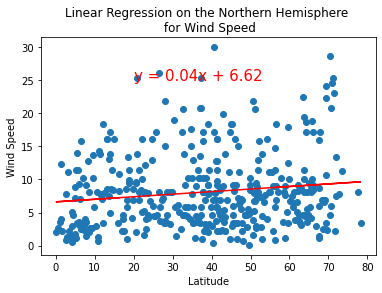

In [92]:
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,25))

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

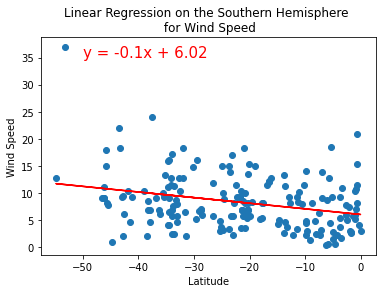

In [94]:
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))